In [1]:
import pygeostat as gs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gs.Parameters['plotting.sigfigs'] = 2
gs.Parameters['plotting.scatter_plot.stat_xy'] = (0.9,0.95)
gs.Parameters['plotting.scatter_plot.s'] = 2
gs.PlotStyle['figure.figsize'] = (10, 10)

<h1 style='color:#1B127A;'>
Data Generation
</h1>

In [6]:
n_sample = 10000
mean = np.array([0, 0, 0, 0])
cov = np.array([[1, 0.8, -0.6, 0.4], [0.8, 1, -0.5, 0.6], [-0.6, -0.5, 1, -0.4], [0.4, 0.6, -0.4, 1]])  # diagonal covariance
cov_inv = np.linalg.inv(cov)
n_mv_samples = np.random.multivariate_normal(mean, cov, n_sample).T

data=pd.DataFrame(dtype=np.float32)
variables = []
for i, variable in enumerate(n_mv_samples):
    var_name = 'Variable%i'%(i+1)
    variables.append(var_name)
    data[var_name] = variable

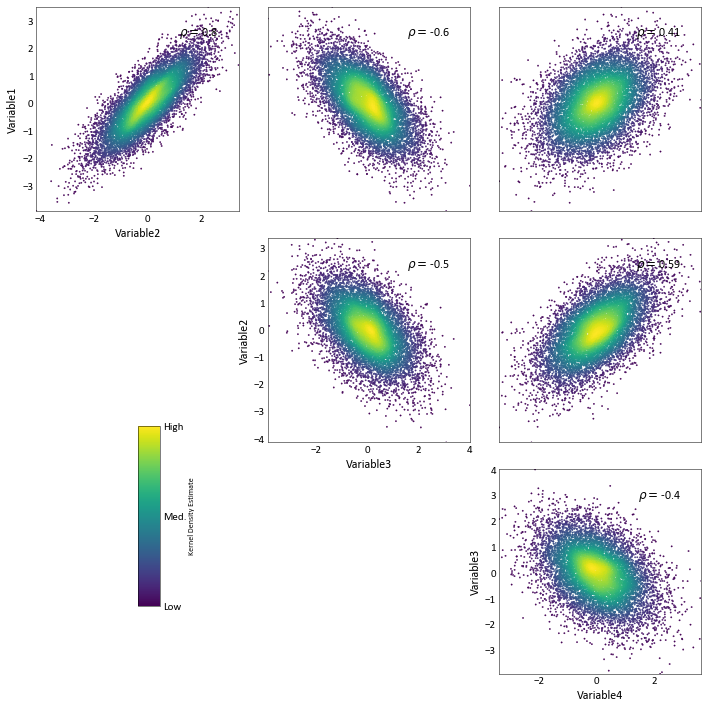

In [7]:
fig= gs.scatter_plots(data)

<h1 style='color:#1B127A;'>
Simple krigining (normal equations)
</h1>

Simple kriging is equivalent to solving multiple linear regression for each data configuration. In both cases, a linear model is proposed to estimate a missing variable. The weights and bias/shift are calculated to minimize the expected squared error (i.e. error variance). It can be shown that weights of a linear model that minimizes the squared error are calculated using the covariance between conditioning variables (features) and between conditioning variables and the response variable (i.e. label).

The main difference is that in case of linear regression, the equally sampled observations of multiple variables are available and can be used to calculate the covariances. However, in kriging (spatial interpolation), the spatial arrangement and the euclidean distance between data locations is provided. In this context, the covariance is the auto-covariance as it is the covariance between one/multiple variables and the spatially lagged one(s). 

In geostatistics, experimental variograms are calculated and assumed to be representative of a stationary domain. A linear model of regionalization/co-regionalization can be used to model the variobaility/variogram along all directions. The variogram is a model of spatial variability and can be used to derive the covariance as a function of spatial distance.


The example in this notebook, is used to show how simple krigining can be used to provide a linear estimator using a multivariate Gaussian data set. The main feature of a multivariate Gaussian distribution is that it is fully quantified by a covariance matrix and a mean vector and the conditional means are given by normal equations. The main objective is to evaluate the simple kriging estimator variance and show how it is expected to be lower than the response variable variance.